# Projeto de Filtro FIR Passa-Baixa com Janela de Kaiser

## Introdução

Filtros FIR (Finite Impulse Response) são amplamente utilizados devido à sua estabilidade, precisão e fase linear, apesar de sua elevada ordem. Neste trabalho, projetamos um filtro FIR passa-baixa usando o método da janela de Kaiser, garantindo:

- Atenuação na banda rejeitada ≥ 50 dB
- Frequência de corte: ωc = π/2
- Região de transição: Δω < 0,1π

Para isso, empregamos a biblioteca SciPy para calcular a resposta do filtro e suas transformações.

## Filtro FIR Passa-Baixa

O filtro será projetado pelo método da janela, usando a janela de Kaiser, que permite controlar a transição e atenuação com o parâmetro β.

### Cálculo do Parâmetro β

O valor de β depende da atenuação desejada:

<img src="https://github.com/JoseRaimundo27/FiltroFIR/blob/main/images/CalculoBeta.png?raw=1" />

In [7]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parâmetros do filtro
atenuacao_desejada = 50  # dB
frequencia_corte = np.pi / 2  # ωc = π/2
largura_transicao = 0.1 * np.pi  # Δω < 0,1π

# Cálculo do parâmetro β
beta = 0.5842 * (atenuacao_desejada - 21) ** 0.4 + 0.07886 * (atenuacao_desejada - 21)

print(f"Parâmetro β calculado: {beta}")

Parâmetro β calculado: 4.533514120981248


### Projeto do Filtro

Com o valor de β calculado, podemos projetar o filtro FIR passa-baixa usando a janela de Kaiser. A seguir, apresentamos o código para projetar o filtro e plotar sua resposta em frequência.

O valor de M será:

<img src="https://github.com/JoseRaimundo27/FiltroFIR/blob/main/images/CalculoM.png?raw=1" />

In [8]:
# Cálculo da ordem M do filtro (num_taps)


M = int(np.ceil((atenuacao_desejada - 8) / (2.285 * largura_transicao)))

print(f"Parâmetro M calculado: {M}")

Parâmetro M calculado: 59


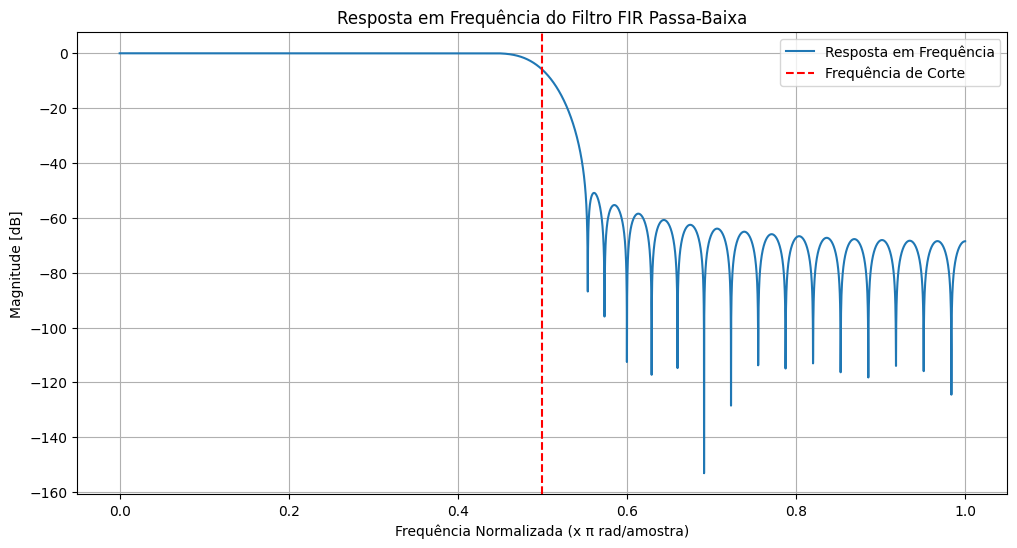

In [9]:


# Projeta o filtro FIR
h_fir = signal.firwin(M, frequencia_corte / np.pi, window=('kaiser', beta), scale=False)

h_fir_original = h_fir


# Resposta em frequência do filtro
frequencias, resposta = signal.freqz(h_fir, worN=8000)

# Plot da resposta em frequência
plt.figure(figsize=(12, 6))
plt.plot(frequencias / np.pi, 20 * np.log10(np.abs(resposta)), label='Resposta em Frequência')

# Configuração do gráfico
plt.title('Resposta em Frequência do Filtro FIR Passa-Baixa')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.axvline(frequencia_corte / np.pi, color='red', linestyle='--', label='Frequência de Corte')
plt.legend()
plt.show()


### Implementação nas Formas Direta e em Cascata

A *forma direta* utiliza os coeficientes do filtro diretamente. Vamos quantizar os coeficientes para estudar a sensibilidade à quantização.

A *forma em cascata* decompõe o filtro em seções de segunda ordem (SOS). Vamos usar a função tf2sos da SciPy para converter a forma direta em cascata.

In [10]:
N = M + 1  # Comprimento correto do filtro
frequencia_corte = 0.5 * np.pi  # Frequência de corte normalizada
beta = 4.55  # Parâmetro da janela de Kaiser

# Criar o filtro FIR com o comprimento correto (N)
h_fir_original = signal.firwin(N, frequencia_corte / np.pi, window=('kaiser', beta), scale=False)

# **Forma direta** - coeficientes do filtro FIR
print("Coeficientes da forma direta (precisão infinita):")
print(h_fir_original)

# **Forma em cascata** - utilizando zeros, polos e ganho
z, p, k = signal.tf2zpk(h_fir_original, [1])  # Zeros, Polos e Ganho
sos_cascata = signal.zpk2sos(z, p, k)  # Converter para SOS

# Exibir os coeficientes na forma cascata
print("\nCoeficientes da forma em cascata (precisão infinita):")
print(sos_cascata)

Coeficientes da forma direta (precisão infinita):
[ 4.17648185e-04  5.94785088e-04 -8.07310872e-04 -1.05921259e-03
  1.35476839e-03  1.69859618e-03 -2.09572044e-03 -2.55166312e-03
  3.07256658e-03  3.66535958e-03 -4.33798173e-03 -5.09968820e-03
  5.96146647e-03  6.93661208e-03 -8.04153447e-03 -9.29690297e-03
  1.07293082e-02  1.23737263e-02 -1.42772723e-02 -1.65051020e-02
  1.91500404e-02  2.23490064e-02 -2.63125718e-02 -3.13817978e-02
  3.81470600e-02  4.77252880e-02 -6.25124398e-02 -8.87418671e-02
  1.49276046e-01  4.49898797e-01  4.49898797e-01  1.49276046e-01
 -8.87418671e-02 -6.25124398e-02  4.77252880e-02  3.81470600e-02
 -3.13817978e-02 -2.63125718e-02  2.23490064e-02  1.91500404e-02
 -1.65051020e-02 -1.42772723e-02  1.23737263e-02  1.07293082e-02
 -9.29690297e-03 -8.04153447e-03  6.93661208e-03  5.96146647e-03
 -5.09968820e-03 -4.33798173e-03  3.66535958e-03  3.07256658e-03
 -2.55166312e-03 -2.09572044e-03  1.69859618e-03  1.35476839e-03
 -1.05921259e-03 -8.07310872e-04  5.9478

Projetamos o filtro FIR utilizando a janela de Kaiser, garantindo um controle preciso sobre sua resposta em frequência. Inicialmente, os coeficientes são calculados na forma direta, onde o filtro é aplicado por convolução. Em seguida, os coeficientes são convertidos para a forma em cascata (SOS), melhorando a estabilidade numérica e a implementação em hardware. A conversão é feita utilizando a decomposição em zeros, polos e ganho (ZPK), seguida da reorganização em seções de segunda ordem. Esse processo permite uma implementação eficiente do filtro, minimizando erros de arredondamento e preservando a precisão da resposta.

In [11]:
import numpy as np
import scipy.signal as signal
import pandas as pd

# Definir parâmetros do filtro
M = 59  # Ordem do filtro
N = M + 1  # Comprimento correto do filtro
frequencia_corte = 0.5 * np.pi  # Frequência de corte normalizada
beta = 4.55  # Parâmetro da janela de Kaiser

# Criar o filtro FIR com o comprimento correto (N)
h_fir_original = signal.firwin(N, frequencia_corte / np.pi, window=('kaiser', beta), scale=False)

# **Forma direta** - coeficientes do filtro FIR
z, p, k = signal.tf2zpk(h_fir_original, [1])  # Zeros, Polos e Ganho
sos_cascata = signal.zpk2sos(z, p, k)  # Converter para SOS

# Criar os índices h[0] até h[59] para a forma direta
indices_fir = [f'h[{i}]' for i in range(len(h_fir_original))]

# Criar um DataFrame com os coeficientes quantizados para diferentes precisões (FIR)
df_coeficientes_fir = pd.DataFrame({
    'Índice': indices_fir,
    '6 Casas': np.round(h_fir_original, 6),
    '5 Casas': np.round(h_fir_original, 5),
    '4 Casas': np.round(h_fir_original, 4),
    '3 Casas': np.round(h_fir_original, 3),
    '2 Casas': np.round(h_fir_original, 2),
    '1 Casa': np.round(h_fir_original, 1),
})

# **Forma em cascata (SOS)**
# Criar índices "H₁(Z), H₂(Z), ..., Hₙ(Z)" para cada seção da forma cascata
indices_sos = [f'H_{i+1}(Z)' for i in range(len(sos_cascata))]

# Criar um DataFrame separado para armazenar os coeficientes da forma em cascata, excluindo a0, a1 e a2
column_names = ['b0', 'b1', 'b2']
df_coeficientes_sos = pd.DataFrame({'H_i(Z)': indices_sos})  # Adiciona os índices primeiro

# Adicionar colunas para quantizações de 6 a 1 casas decimais
for prec in [6, 5, 4, 3, 2, 1]:
    for i, col in enumerate(column_names):
        df_coeficientes_sos[f'{prec} Casas {col}'] = np.round(sos_cascata[:, i], prec)

# Salvar em arquivos Excel
df_coeficientes_fir.to_excel("coeficientes_fir.xlsx", index=False)
df_coeficientes_sos.to_excel("coeficientes_sos.xlsx", index=False)

# Exibir os DataFrames dentro do Jupyter Notebook
from IPython.display import display
print("✅ Coeficientes da forma direta (Precisão Finita)")
display(df_coeficientes_fir)
print("✅ Coeficientes da forma em cascata (Precisão Finita)")
display(df_coeficientes_sos)


ModuleNotFoundError: No module named 'openpyxl'

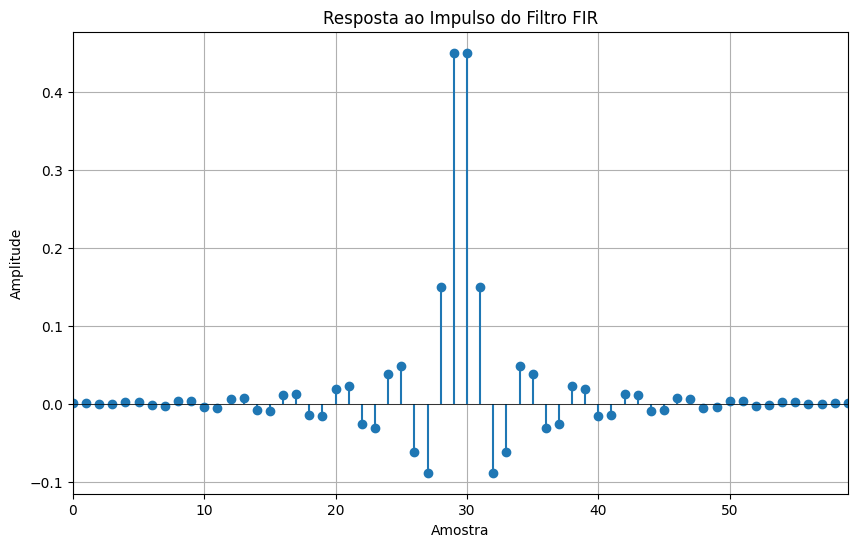

In [ ]:
# Código atualizado para garantir que a função exiba o gráfico corretamente
import numpy as np
import matplotlib.pyplot as plt

# Função para plotar a resposta ao impulso do filtro FIR
def plot_impulse_response(N, h_fir_original):
    plt.figure(figsize=(10, 6))
    plt.stem(range(N), h_fir_original[:N], basefmt=" ")  # Certificar que o comprimento corresponde a N
    plt.title('Resposta ao Impulso do Filtro FIR')
    plt.xlabel('Amostra')
    plt.ylabel('Amplitude')
    plt.xlim(0, N - 1)
    plt.axhline(0, color='black', linestyle='-', linewidth=0.5)  # Linha central
    plt.grid(True)  # Ativar grade para melhor visualização
    plt.show()

# Garantir que os coeficientes do filtro estão definidos
if 'h_fir_original' in globals():
    plot_impulse_response(len(h_fir_original), h_fir_original)
else:
    print("Erro: h_fir_original não está definido.")


Plotamos a resposta ao impulso de um filtro FIR








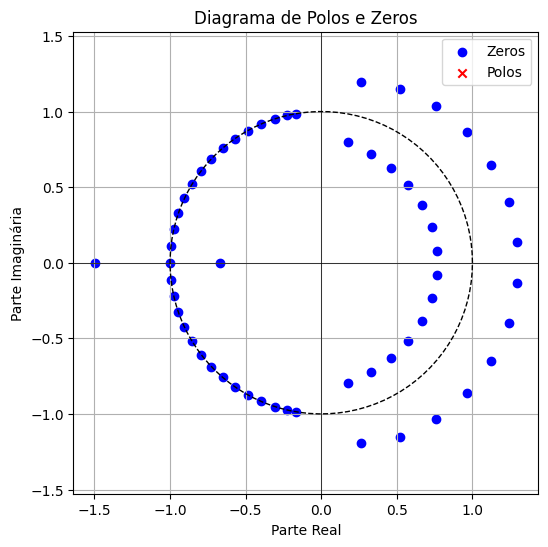

In [ ]:
# Obter zeros, polos e ganho
z, p, k = signal.tf2zpk(h_fir_original, [1])  # Zeros, Polos e Ganho

# Criar o diagrama de polos e zeros
plt.figure(figsize=(6, 6))
plt.scatter(np.real(z), np.imag(z), marker='o', color='blue', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='red', label='Polos')

# Desenhar o círculo unitário
theta = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), linestyle='dashed', color='black', linewidth=1)

# Configuração do gráfico
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Diagrama de Polos e Zeros')
plt.grid(True)
plt.legend()
plt.axis('equal')  # Para manter a proporção circular
plt.show()

Essa característica indica que o filtro é causal e estável, pois os polos não se encontram fora do círculo unitário. Além disso, a simetria dos zeros sugere que o filtro é do tipo passa-baixa, pois atenua frequências mais altas enquanto preserva as baixas frequências. o fato de o filtro possuir um zero na frequência
−
𝜋
−π radianos/amostra indica que ele anula a frequência de Nyquist (
𝜔
=
𝜋
). Isso reforça a classificação do filtro como um filtro FIR do Tipo 1 e sugere que ele pode ser um filtro passa-baixa.

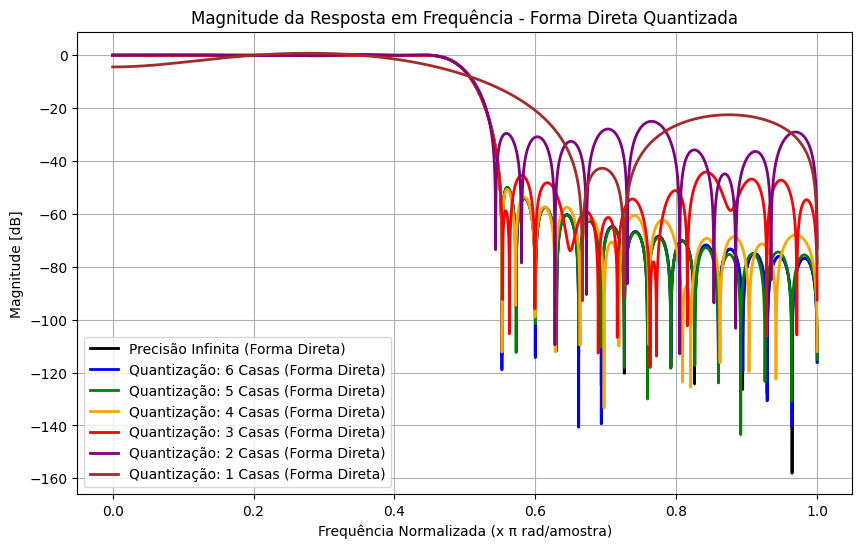

In [ ]:
# Atualizar os níveis de quantização para incluir 2 casas decimais
niveis_quantizacao = [None, 6, 5, 4, 3, 2, 1]
cores = ['black', 'blue', 'green', 'orange', 'red', 'purple', 'brown']
titulos = [
    "Precisão Infinita (Forma Direta)",
    "Quantização: 6 Casas (Forma Direta)",
    "Quantização: 5 Casas (Forma Direta)",
    "Quantização: 4 Casas (Forma Direta)",
    "Quantização: 3 Casas (Forma Direta)",
    "Quantização: 2 Casas (Forma Direta)",
    "Quantização: 1 Casas (Forma Direta)"
]

# Criar a figura para um único gráfico com todas as curvas na forma direta
plt.figure(figsize=(10, 6))

for casas, cor, titulo in zip(niveis_quantizacao, cores, titulos):
    if casas is None:
        h_fir = h_fir_original  # Sem quantização
    else:
        h_fir = np.round(h_fir_original, casas)  # Aplicar arredondamento direto

    # Calcular a resposta em frequência
    w, H = signal.freqz(h_fir, worN=8000)
    magnitude_H = 20 * np.log10(np.maximum(np.abs(H), 1e-10))  # Evita log(0)

    # Plotar todas as curvas em um único gráfico
    plt.plot(w / np.pi, magnitude_H, color=cor, linewidth=2, label=titulo)

# Configuração do gráfico
plt.title('Magnitude da Resposta em Frequência - Forma Direta Quantizada')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.legend()
plt.show()


Enquanto a precisão infinita mantém o comportamento ideal, quantizações menores causam distorções progressivas, especialmente nas altas frequências. Com 6 e 5 casas decimais, a resposta permanece estável, mas a partir de 4 casas começam a surgir perturbações. Para 3, 2 e 1 casas, há forte degradação e oscilações acentuadas.  

Na forma direta, o filtro é implementado diretamente a partir da função de transferência, sem decomposição.

Sensibilidade: A forma direta tende a ser mais sensível a erros de quantização, especialmente em filtros de ordem elevada. Isso ocorre porque pequenos erros nos coeficientes podem afetar significativamente a resposta do filtro.

Estabilidade: Em filtros de alta ordem, a forma direta pode ser menos estável numericamente devido ao acúmulo de erros de arredondamento.

Na forma direta, a quantização afeta todos os coeficientes do filtro simultaneamente.
Pequenas alterações nos coeficientes podem provocar mudanças significativas na resposta do filtro, afetando a faixa de transição.
Como os coeficientes são aplicados diretamente em uma única equação, erros acumulados impactam a resposta de frequência globalmente.

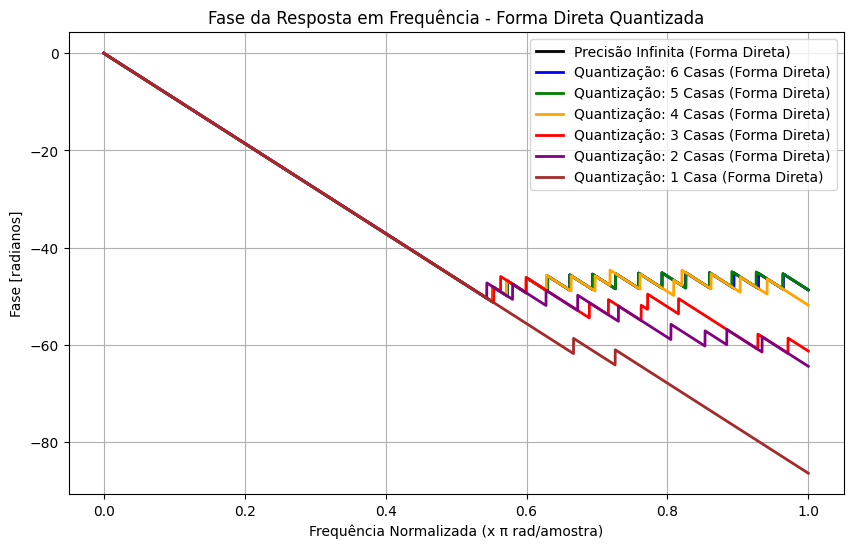

In [ ]:
# Adicionar quantizações para 2 e 1 casa decimal
niveis_quantizacao = [None, 6, 5, 4, 3, 2, 1]
cores = ['black', 'blue', 'green', 'orange', 'red', 'purple', 'brown']
titulos = [
    "Precisão Infinita (Forma Direta)",
    "Quantização: 6 Casas (Forma Direta)",
    "Quantização: 5 Casas (Forma Direta)",
    "Quantização: 4 Casas (Forma Direta)",
    "Quantização: 3 Casas (Forma Direta)",
    "Quantização: 2 Casas (Forma Direta)",
    "Quantização: 1 Casa (Forma Direta)"
]

# Criar a figura para um único gráfico com todas as curvas de fase sobrepostas
plt.figure(figsize=(10, 6))

for casas, cor, titulo in zip(niveis_quantizacao, cores, titulos):
    if casas is None:
        h_fir = h_fir_original  # Sem quantização
    else:
        h_fir = np.round(h_fir_original, casas)  # Aplicar arredondamento direto

    # Calcular a resposta em frequência
    w, H = signal.freqz(h_fir, worN=8000)
    fase_H = np.unwrap(np.angle(H))  # Desfazer descontinuidades na fase

    # Plotar todas as curvas em um único gráfico
    plt.plot(w / np.pi, fase_H, color=cor, linewidth=2, label=titulo)

# Configuração do gráfico
plt.title('Fase da Resposta em Frequência - Forma Direta Quantizada')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Fase [radianos]')
plt.grid(True)
plt.legend()
plt.show()


A diferença na fase da resposta em frequência conforme a precisão diminui ocorre devido aos erros de quantização nos coeficientes do filtro FIR. A quantização introduz pequenas variações nos coeficientes, o que altera ligeiramente a posição dos polos e zeros do filtro. Essas variações afetam a fase ao longo da banda de frequência, especialmente nas frequências mais altas, onde o efeito da quantização se torna mais pronunciado. Conforme o número de casas decimais diminui, os erros de arredondamento acumulam-se, resultando em uma fase menos linear e introduzindo distorções perceptíveis

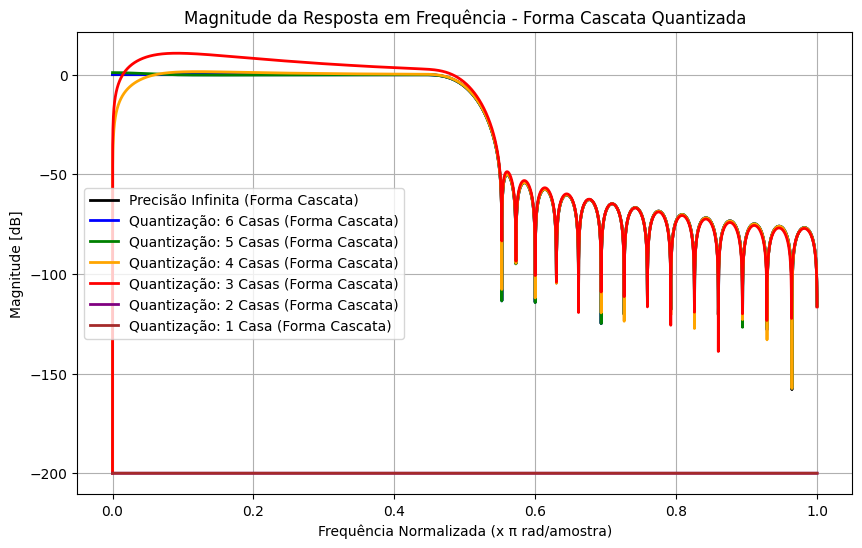

In [ ]:
# Criar a figura para um único gráfico com todas as curvas e legenda
plt.figure(figsize=(10, 6))

# Converter para forma cascata (Second-Order Sections - SOS)
sos_cascata_original = signal.tf2sos(h_fir_original, [1])

for casas, cor, titulo in zip(niveis_quantizacao, cores, titulos):
    if casas is None:
        sos = sos_cascata_original  # Sem quantização
    else:
        sos = np.round(sos_cascata_original, casas)  # Aplicar arredondamento direto

    # Calcular a resposta em frequência
    w, H = signal.sosfreqz(sos, worN=8000)
    magnitude_H = 20 * np.log10(np.maximum(np.abs(H), 1e-10))  # Evita log(0)

    # Plotar todas as curvas em um único gráfico
    plt.plot(w / np.pi, magnitude_H, color=cor, linewidth=2, label=titulo)

# Configuração do gráfico
plt.title('Magnitude da Resposta em Frequência - Forma Cascata Quantizada')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.legend()
plt.show()


A estrutura em cascata sofre mais com a propagação do erro de quantização, enquanto na forma direta o erro afeta diretamente os coeficientes do filtro, mas não se propaga por múltiplas seções.

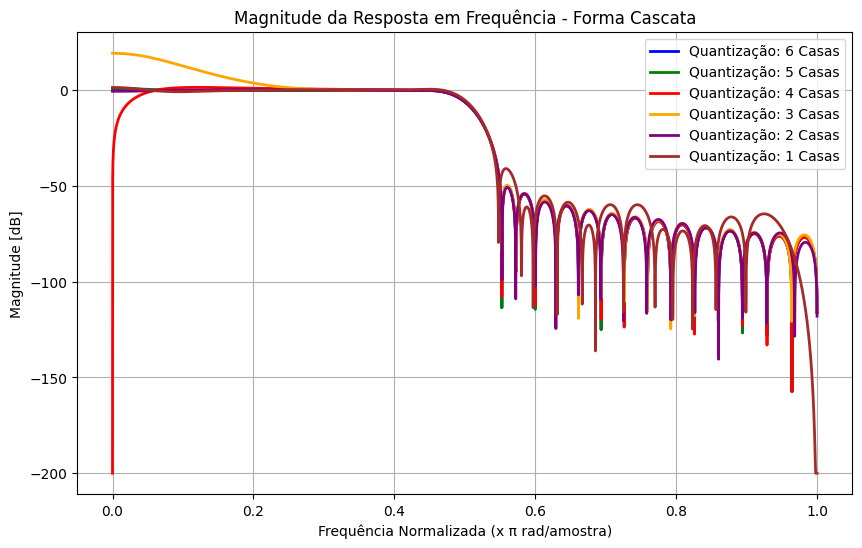

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Resgatar coeficientes na precisão infinita
sos_cascata_original = signal.zpk2sos(z, p, k)

# Definir precisões a serem analisadas
precisoes = [6, 5, 4, 3, 2, 1]
cores = ['blue', 'green', 'red', 'orange', 'purple', 'brown']

# Criar a figura
plt.figure(figsize=(10, 6))

# Iterar sobre cada precisão e calcular a resposta em frequência
for prec, cor in zip(precisoes, cores):
    sos_quantizado = np.round(sos_cascata_original, prec)
    sos_quantizado[sos_quantizado == 0] = sos_cascata_original[sos_quantizado == 0]  # Restaurar valores nulos

    # Calcular a resposta em frequência
    w, H = signal.sosfreqz(sos_quantizado, worN=8000)
    magnitude_H = 20 * np.log10(np.maximum(np.abs(H), 1e-10))  # Evita log(0)

    # Plotar a magnitude da resposta em frequência
    plt.plot(w / np.pi, magnitude_H, color=cor, linewidth=2, label=f'Quantização: {prec} Casas')

# Configuração do gráfico
plt.title('Magnitude da Resposta em Frequência - Forma Cascata')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude [dB]')
plt.grid(True)
plt.legend()
plt.show()


Na forma em cascata, o filtro é decomposto em seções de segunda ordem (ou de primeira ordem, se necessário), conectadas em série.

Sensibilidade: A forma em cascata é geralmente menos sensível a erros de quantização, pois cada seção de segunda ordem é implementada de forma independente, reduzindo a propagação de erros.

Estabilidade: A forma em cascata é mais estável numericamente, especialmente para filtros de alta ordem, pois os polos e zeros são agrupados em seções menores, minimizando problemas de precisão.

Em 2 e 1 casa decimal, o filtro não está mais filtrando corretamente. Em vez disso, ele atenua tudo de forma uniforme, fazendo com que o sinal de saída seja praticamente zero para todas as frequências.
-200 dB significa que o sinal está sendo atenuado por um fator de aproximadamente
$10^{-10}$ , ou seja, quase nenhum sinal passa.

### Análise da Sensibilidade à Quantização
Vamos comparar a resposta em frequência do filtro com precisão infinita e com precisão finita

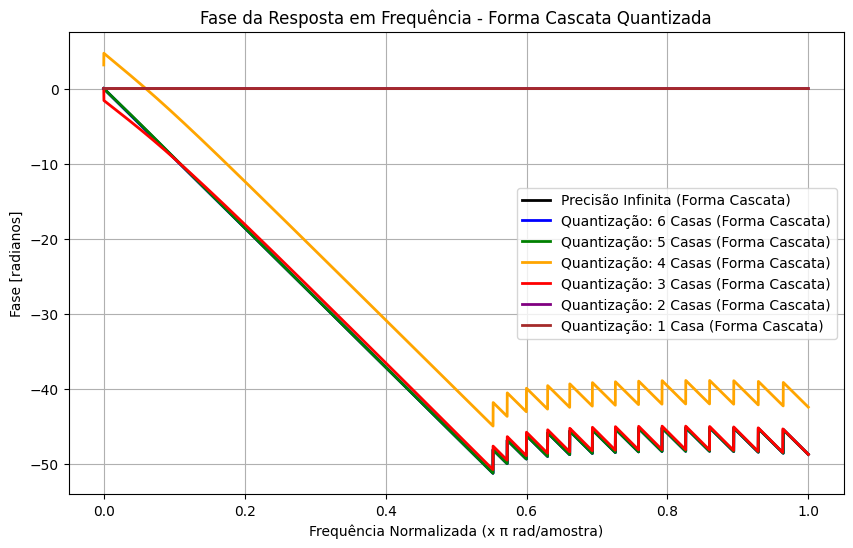

In [ ]:
# Converter para forma cascata (Second-Order Sections - SOS)
sos_cascata_original = signal.tf2sos(h_fir_original, [1])

# Definir novos níveis de quantização para 6, 5, 4, 3, 2 e 1 casas decimais
niveis_quantizacao = [None, 6, 5, 4, 3, 2, 1]
cores = ['black', 'blue', 'green', 'orange', 'red', 'purple', 'brown']
titulos = [
    "Precisão Infinita (Forma Cascata)",
    "Quantização: 6 Casas (Forma Cascata)",
    "Quantização: 5 Casas (Forma Cascata)",
    "Quantização: 4 Casas (Forma Cascata)",
    "Quantização: 3 Casas (Forma Cascata)",
    "Quantização: 2 Casas (Forma Cascata)",
    "Quantização: 1 Casa (Forma Cascata)"
]

# Criar a figura para um único gráfico com todas as curvas de fase sobrepostas
plt.figure(figsize=(10, 6))

for casas, cor, titulo in zip(niveis_quantizacao, cores, titulos):
    if casas is None:
        sos = sos_cascata_original  # Sem quantização
    else:
        sos = np.round(sos_cascata_original, casas)  # Aplicar arredondamento direto

    # Calcular a resposta em frequência
    w, H = signal.sosfreqz(sos, worN=8000)
    fase_H = np.unwrap(np.angle(H))  # Desfazer descontinuidades na fase

    # Plotar todas as curvas em um único gráfico
    plt.plot(w / np.pi, fase_H, color=cor, linewidth=2, label=titulo)

# Configuração do gráfico
plt.title('Fase da Resposta em Frequência - Forma Cascata Quantizada')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Fase [radianos]')
plt.grid(True)
plt.legend()
plt.show()

A fase é determinada pela posição dos polos e zeros. Quando a precisão é extremamente baixa:
Os coeficientes se tornam muito aproximados, causando uma redistribuição indesejada dos zeros.
Se os zeros do filtro se cancelam ou desaparecem, o sistema pode se comportar como um simples atraso de fase nula em toda a faixa de frequência.
Como resultado, a fase permanece constante, sem variações.

Quando os coeficientes são arredondados para 1 casa decimal, muitos deles se tornam zero ou valores muito pequenos.
Isso elimina ou desloca os zeros do filtro, fazendo com que a resposta do sistema se torne praticamente um ganho constante (ou um sistema trivial sem variação significativa na frequência).
Como um sistema sem zeros significativos não tem variação de fase, a resposta de fase se mantém constante em 0.

### Transformações em frequência


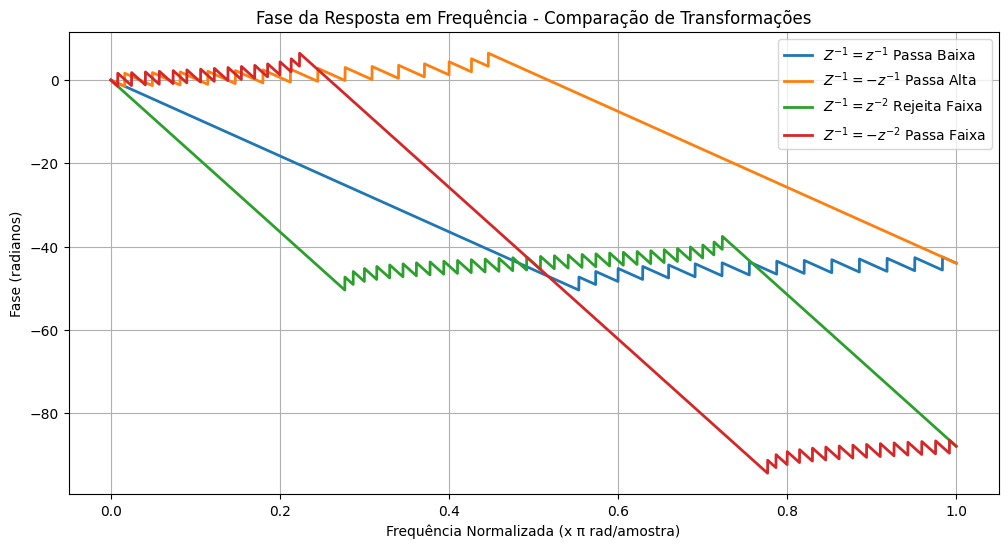

In [ ]:
# Reimportar as bibliotecas após o reset do estado
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parâmetros do filtro
atenuacao_desejada = 50  # dB
frequencia_corte = np.pi / 2  # ωc = π/2
largura_transicao = 0.1 * np.pi  # Δω < 0,1π

# Cálculo do parâmetro β
beta = 0.5842 * (atenuacao_desejada - 21) ** 0.4 + 0.07886 * (atenuacao_desejada - 21)

# Cálculo da ordem M do filtro (num_taps)
M = int(np.ceil((atenuacao_desejada - 8) / (2.285 * largura_transicao)))

# Projeta o filtro FIR
h_fir = signal.firwin(M, frequencia_corte/np.pi, window=('kaiser', beta), scale=False)

# Função para aplicar as transformações no filtro FIR
def transformar_filtro1(h_fir, transformacao):
    if transformacao == 1:
        # Z^{-1} = -z^{-1}
        return h_fir * (-1) ** np.arange(len(h_fir))
    elif transformacao == 2:
        # Z^{-1} = z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir
        return novos_h_fir
    elif transformacao == 3:
        # Z^{-1} = -z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir * (-1) ** np.arange(len(h_fir))
        return novos_h_fir

# Definir as transformações aplicadas ao filtro
transformacoes = [
    (r'$Z^{-1} = z^{-1}$ Passa Baixa', h_fir),
    (r'$Z^{-1} = -z^{-1}$ Passa Alta', transformar_filtro1(h_fir, 1)),
    (r'$Z^{-1} = z^{-2}$ Rejeita Faixa', transformar_filtro1(h_fir, 2)),
    (r'$Z^{-1} = -z^{-2}$ Passa Faixa', transformar_filtro1(h_fir, 3))
]

# Criar o gráfico com todas as fases das transformações
plt.figure(figsize=(12, 6))

for nome, h_transf in transformacoes:
    w_transf, resposta_transformada = signal.freqz(h_transf, worN=8000)
    fase_resposta = np.unwrap(np.angle(resposta_transformada))  # Corrigir descontinuidades
    plt.plot(w_transf / np.pi, fase_resposta, label=nome, linewidth=2)

# Configuração do gráfico
plt.title('Fase da Resposta em Frequência - Comparação de Transformações')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Fase (radianos)')
plt.grid(True)
plt.legend()
plt.show()


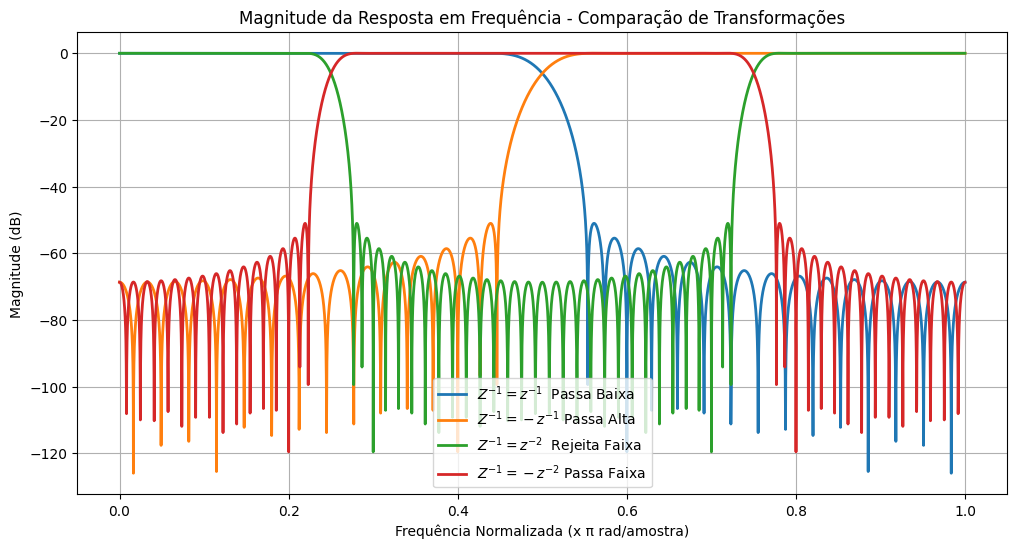

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Parâmetros do filtro FIR
M = 59  # Ordem do filtro
frequencia_corte = 0.5 * np.pi  # Frequência de corte normalizada
beta = 4.55  # Parâmetro da janela de Kaiser (corrigido)

# Criar o filtro FIR
h_fir = signal.firwin(M, frequencia_corte/np.pi, window=('kaiser', beta), scale=False)

# Função para aplicar transformações no filtro FIR
def transformar_filtro1(h_fir, transformacao):
    if transformacao == 1:
        # Z^{-1} = -z^{-1}
        return h_fir * (-1) ** np.arange(len(h_fir))
    elif transformacao == 2:
        # Z^{-1} = z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir
        return novos_h_fir
    elif transformacao == 3:
        # Z^{-1} = -z^{-2}
        novos_h_fir = np.zeros(2 * len(h_fir) - 1)
        novos_h_fir[::2] = h_fir * (-1) ** np.arange(len(h_fir))
        return novos_h_fir

# Aplicar as transformações no filtro
transformacoes = [
    (r'$Z^{-1} = z^{-1}$  Passa Baixa', h_fir),
    (r'$Z^{-1} = -z^{-1}$ Passa Alta', transformar_filtro1(h_fir, 1)),
    (r'$Z^{-1} = z^{-2}$  Rejeita Faixa', transformar_filtro1(h_fir, 2)),
    (r'$Z^{-1} = -z^{-2}$ Passa Faixa', transformar_filtro1(h_fir, 3))
]

# Criar o gráfico com todas as magnitudes
plt.figure(figsize=(12, 6))

for nome, h_transf in transformacoes:
    w_transf, resposta_transformada = signal.freqz(h_transf, worN=8000)
    magnitude_resposta = np.abs(resposta_transformada)  # Obter a magnitude
    plt.plot(w_transf / np.pi, 20 * np.log10(magnitude_resposta), label=nome, linewidth=2)  # Em dB

# Configuração do gráfico
plt.title('Magnitude da Resposta em Frequência - Comparação de Transformações')
plt.xlabel('Frequência Normalizada (x π rad/amostra)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)
plt.legend()
plt.show()


# Resultados
Com base nos gráficos analisados, podemos concluir que a forma direta de implementação de filtros FIR é significativamente mais sensível à quantização dos coeficientes, ou seja, à redução do número de casas decimais. Isso se deve ao fato de que pequenas alterações nos coeficientes afetam diretamente a resposta em frequência do filtro, resultando em mudanças perceptíveis na magnitude. Por outro lado, a forma em cascata demonstrou maior robustez à quantização, mantendo uma resposta em frequência mais estável mesmo com a redução do número de casas decimais. Essa diferença ocorre porque a estrutura em cascata divide o filtro em seções de segunda ordem, limitando a propagação de erros e tornando-a mais adequada para implementações em sistemas com precisão finita. Portanto, a forma em cascata é preferível em aplicações práticas onde a quantização dos coeficientes é inevitável.


Forma direta: Funciona bem com quantização alta, mas degrada rapidamente em precisão mais baixa.
Forma cascata: Mais estável para quantização moderada, mas pode sofrer cancelamentos severos em precisão muito baixa.
Se a precisão for limitada (1 ou 2 casas decimais), o filtro se torna inutilizável.

##Forma Direta: Convolução Explícita
A forma direta de um filtro FIR é representada como uma soma ponderada de valores da entrada, ou seja:

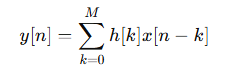

Isso significa que cada saída
𝑦
[
𝑛
]
 é obtida diretamente através da convolução discreta entre a entrada
𝑥
[
𝑛
]
 e os coeficientes
ℎ
[
𝑘
]
:

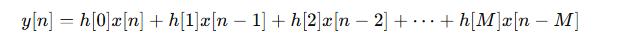

Aqui, mesmo se alguns coeficientes forem reduzidos a zero devido à quantização, os coeficientes restantes ainda influenciam a resposta do sistema, garantindo que o filtro continue funcionando — apenas com uma resposta um pouco alterada.

##Forma Cascata: Seções de Segunda Ordem

Na forma cascata, o filtro é decomposto em várias seções de segunda ordem (SOS). Cada seção representa um sistema de segunda ordem com a seguinte equação de diferenças:

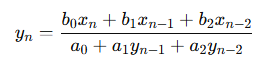

Ou seja, o sinal de entrada é processado sequencialmente por várias pequenas etapas, onde cada etapa pode alterar significativamente o resultado final.

A forma cascata NÃO é simplesmente uma convolução única, pois o sistema está dividido em múltiplos pequenos filtros de segunda ordem, cada um processando a saída do anterior. Isso significa que:

* Se uma dessas seções tiver b0 = b1 = b2 = 0, essa seção não gera saída nenhuma.

* Como a saída de uma seção alimenta a entrada da próxima, se uma seção gera apenas zeros, ela "bloqueia" o sinal para as próximas seções, resultando em zero para todas as seções seguintes.

Na forma direta, a convolução sempre mantém a estrutura do sinal.
Mesmo que alguns coeficientes sejam reduzidos a zero, os coeficientes restantes ainda aplicam sua operação de convolução.
Na forma cascata, cada seção depende da saída da anterior.
Se uma seção "morre" devido a quantização (b0 = b1 = b2 = 0), todas as seções seguintes deixam de processar qualquer informação, pois sua entrada será zero.

##A Relação Fundamental: A Fórmula de Bode
Para um sistema linear e causal, a fase
𝜃
(
𝜔
)
 pode ser obtida a partir da magnitude
∣
𝐻
(
𝜔
)
∣
 usando a transformada de Hilbert, ou na sua forma mais prática:

 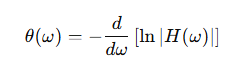

Essa equação mostra que:

* Se a magnitude decai suavemente, a fase muda suavemente.
* Se a magnitude cai abruptamente (como após a frequência de corte), a fase  
  muda abruptamente.
* Se houver zeros na resposta de magnitude, a fase pode sofrer saltos repentinos.

Explicação Intuitiva
A equação acima pode ser interpretada assim:

* A fase de um filtro depende da variação da magnitude em relação à frequência.
* Sempre que a magnitude sofre uma transição abrupta (por exemplo, a queda após a frequência de corte), a fase responde com mudanças rápidas.
* Em um filtro FIR, a posição dos zeros influencia essa relação, porque a magnitude tende a cair perto dos zeros, causando perturbações na fase.

##Representação Direta

###Antes da Frequência de Corte (𝜔<𝜔𝑐)

* A magnitude do filtro é constante (ou quase constante).
Como a derivada d/dω de um valor constante é zero, a fase varia linearmente (fase linear esperada para FIRs).

###Depois da Frequência de Corte (𝜔>𝜔𝑐)

A magnitude começa a cair rapidamente.

* Pela equação de Bode, a fase responde com quedas mais acentuadas e começa a parecer um pente.
* O efeito de pente ocorre porque os zeros do filtro criam regiões onde a magnitude oscila, levando a variações rápidas na fase.

###Para 2 e 1 Casas Decimais

* Muitos coeficientes são arredondados, afetando os zeros.
* A magnitude não cai tão suavemente como antes, o que bagunça a derivada da magnitude.
Isso explica as oscilações erráticas na fase em vez de um pente bem definido.



